### 1 Análise Exploratória dos Dados

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

a. Carregue a base de dados media_precos_carros_brasil.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
dados = pd.read_csv('precos_carros_brasil.csv')
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
resolver o problema de valores faltantes

In [4]:
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [5]:
dados.dropna(axis='index', inplace=True)

In [6]:
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

c. Verifique se há dados duplicados nos dados

In [7]:
dados.duplicated().sum()

2

In [8]:
dados.drop_duplicates(inplace=True)
dados.duplicated().sum()

0

d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo
de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [9]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [10]:
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [11]:
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [12]:
dados.model.value_counts()

Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: model, Length: 2112, dtype: int64

In [13]:
dados.brand.value_counts()

Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: brand, dtype: int64

f. Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados
encontrados na Análise Exploratória dos dados

---

### 2 Visualização dos dados

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

a. Gere um gráfico da distribuição da quantidade de carros por marca

[Text(0, 0, '44962'),
 Text(0, 0, '44312'),
 Text(0, 0, '38590'),
 Text(0, 0, '33150'),
 Text(0, 0, '29191'),
 Text(0, 0, '12090')]

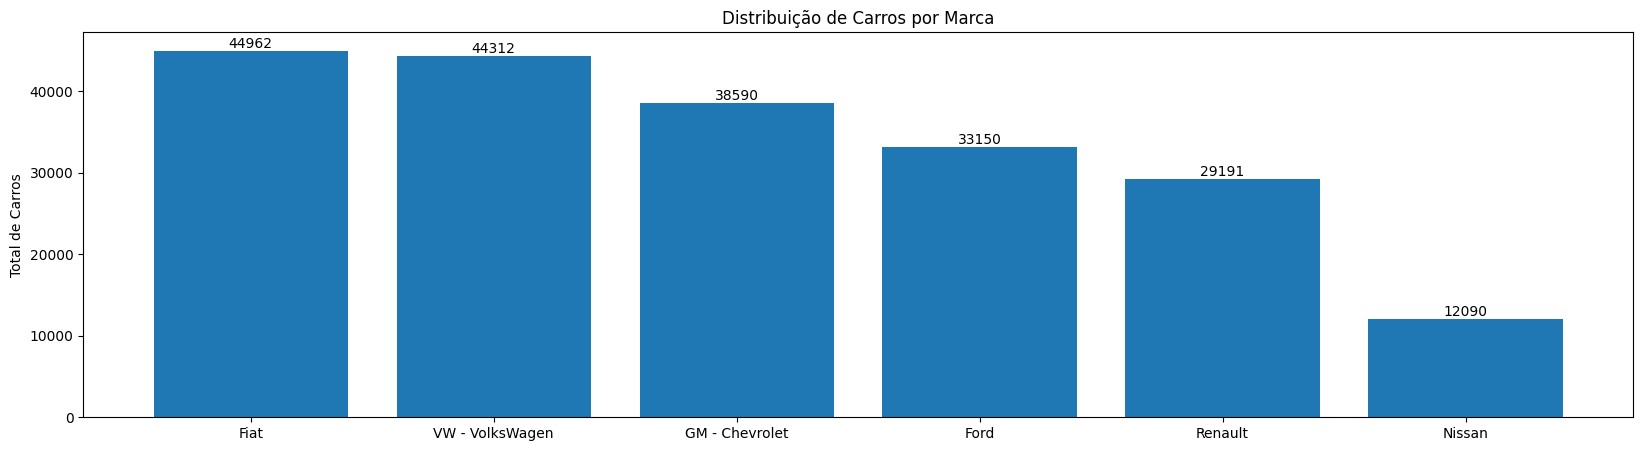

In [14]:
valores_contados_marca = dados.brand.value_counts()

plt.figure(figsize=(20,5)) 
grafico_carros_por_marca = plt.bar(valores_contados_marca.index, valores_contados_marca.values) 
plt.title('Distribuição de Carros por Marca')
plt.ylabel('Total de Carros')
plt.bar_label(grafico_carros_por_marca, size=10)

b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do
carro

[Text(0, 0, '161883'), Text(0, 0, '40412')]

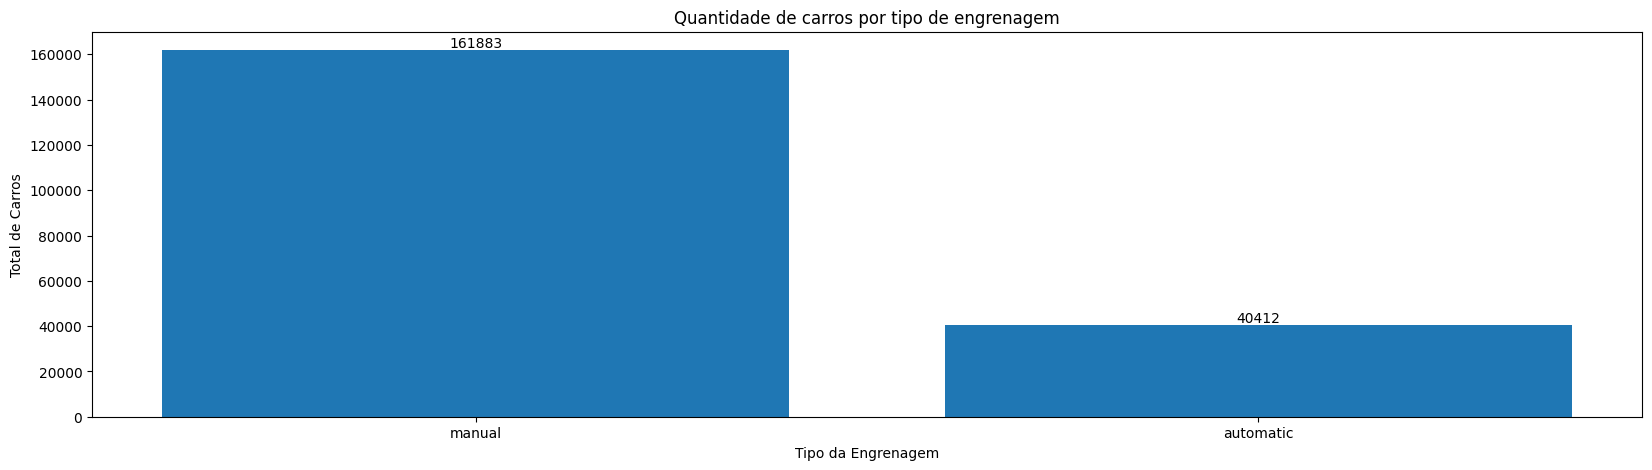

In [15]:
valores_contados_engrenagem = dados.gear.value_counts()

plt.figure(figsize=(20,5))
grafico_engrenagem = plt.bar(valores_contados_engrenagem.index, valores_contados_engrenagem.values) 
plt.title('Quantidade de carros por tipo de engrenagem')
plt.ylabel('Total de Carros')
plt.xlabel('Tipo da Engrenagem')
plt.bar_label(grafico_engrenagem, size=10)

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de
2022 (variável de tempo no eixo X)

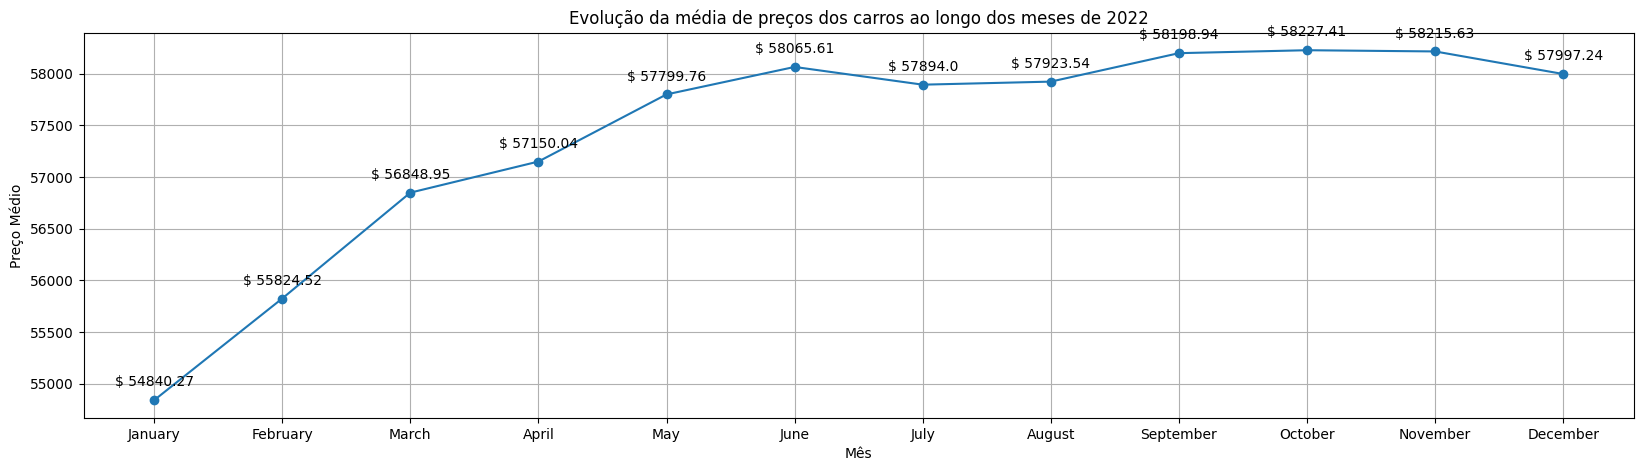

In [16]:
dados.month_of_reference = pd.Categorical(dados.month_of_reference, 
                                          categories=dados.month_of_reference.unique(), 
                                          ordered=True)

carros_2022 = dados[dados.year_of_reference == 2022]
carros_2022_serie = carros_2022.groupby(['month_of_reference'])['avg_price_brl'].mean()

plt.figure(figsize=(20,5))
grafico_1 = plt.plot(carros_2022_serie, marker='o', linestyle='-')

for i, (xi, yi) in enumerate(zip(carros_2022_serie.index, carros_2022_serie.values)):
    plt.annotate(f'$ {round(yi, 2)}', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("Evolução da média de preços dos carros ao longo dos meses de 2022", fontsize=12)
plt.ylabel("Preço Médio", fontsize=10)
plt.xlabel("Mês", fontsize=10)
plt.grid(True)

d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

Text(0.5, 0, 'Marca')

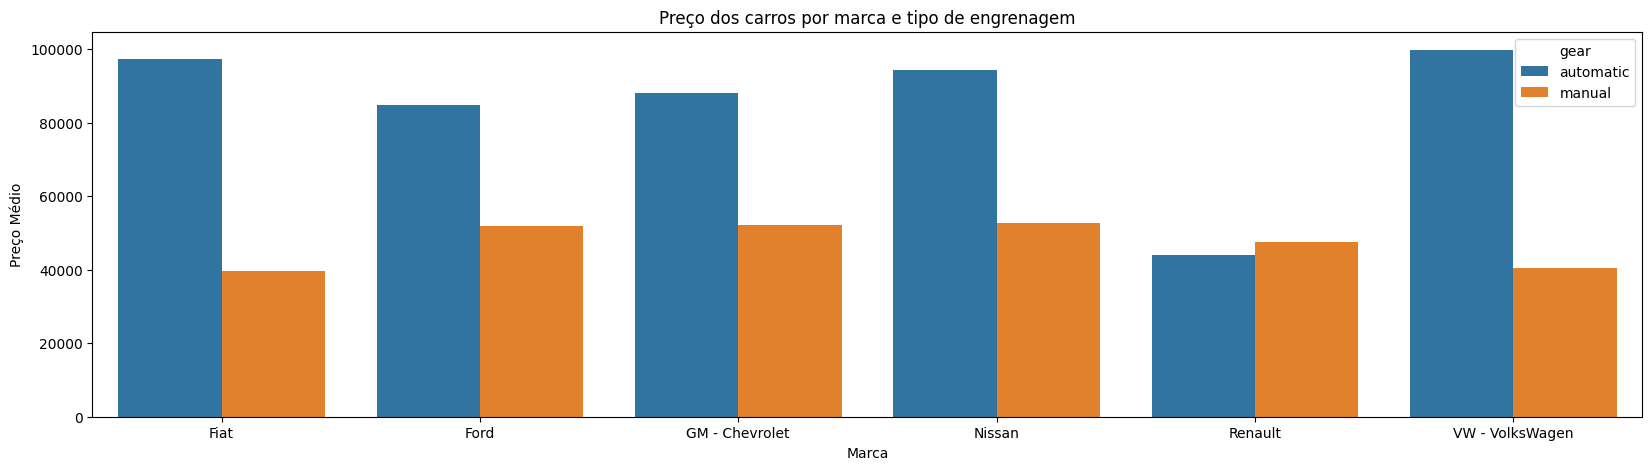

In [17]:
preco_marca_engrenagem = dados.groupby(['brand', 'gear']).avg_price_brl.mean().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x="brand", y='avg_price_brl', hue='gear', data=preco_marca_engrenagem, hue_order=preco_marca_engrenagem.gear.unique())

plt.title("Preço dos carros por marca e tipo de engrenagem", fontsize=12)
plt.ylabel("Preço Médio", fontsize=10)
plt.xlabel("Marca", fontsize=10)

e. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d

f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

Text(0.5, 0, 'Marca')

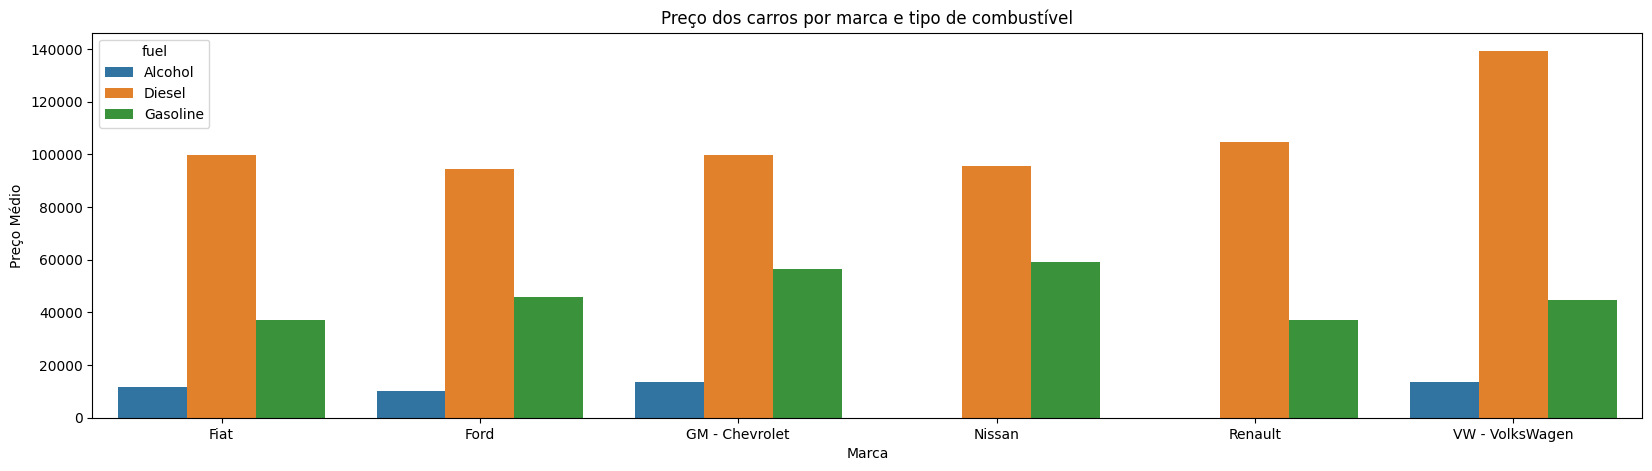

In [18]:
preco_marca_combustivel = dados.groupby(['brand', 'fuel']).avg_price_brl.mean().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(x="brand", y='avg_price_brl', hue='fuel', data=preco_marca_combustivel, hue_order=preco_marca_combustivel.fuel.unique())
plt.title("Preço dos carros por marca e tipo de combustível", fontsize=12)
plt.ylabel("Preço Médio", fontsize=10)
plt.xlabel("Marca", fontsize=10)

g. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f

---
### 3 Aplicação de modelos de machine learning para prever o preço médio dos carros

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis
independentes do modelo. A variável target é avg_price. Observação: caso julgue
necessário, faça a transformação de variáveis categóricas em variáveis numéricas para
inputar no modelo. Indique quais variáveis foram transformadas e como foram
transformadas

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

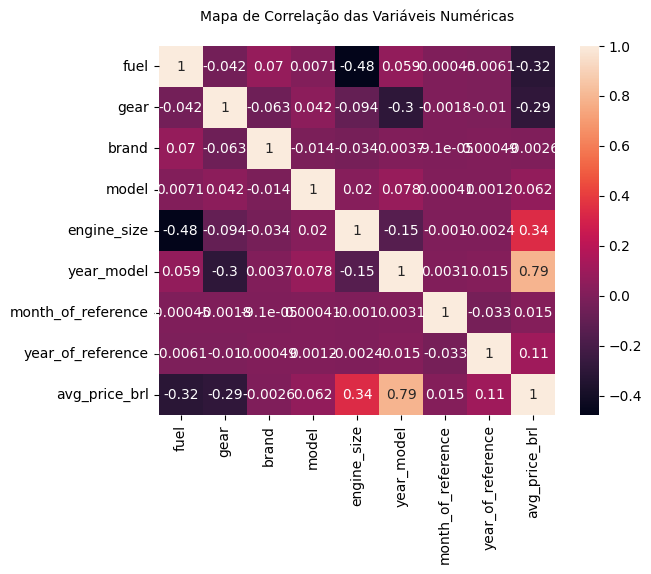

In [20]:
colunas_selecionadas = ['fuel', 'gear', 'brand', 'model', 'engine_size', 'year_model', 'month_of_reference', 'year_of_reference', 'avg_price_brl']
ml_dados = dados[colunas_selecionadas]

ml_dados.engine_size = ml_dados.engine_size.apply(lambda s: s.replace(',', '.')).astype(float)

categoricas = ['fuel', 'gear', 'brand', 'month_of_reference', 'model']

label_encoder = LabelEncoder()

for coluna in categoricas: ml_dados[coluna] = label_encoder.fit_transform(ml_dados[coluna])

sns.heatmap(ml_dados.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 10)
plt.show()

b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [21]:
X = ml_dados.drop(['avg_price_brl'], axis = 1)

Y = ml_dados['avg_price_brl']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost
(biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso
julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique
quais parâmetros foram inputados e indique o treinamento de cada modelo

In [22]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

model_xgb = XGBRegressor()
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

d. Grave os valores preditos em variáveis criadas

In [23]:
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_xgboost = model_xgb.predict(X_test)

e. Realize a análise de importância das variáveis para estimar a variável target, para cada
modelo treinado

In [24]:
model_rf.feature_importances_
feature_importances_rf = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances_rf

,importance
engine_size,0.451192
year_model,0.390761
model,0.057728
gear,0.032244
fuel,0.032215
brand,0.018336
year_of_reference,0.012324
month_of_reference,0.005200


In [25]:
model_xgb.feature_importances_
feature_importances_rf = pd.DataFrame(model_xgb.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances_rf

,importance
engine_size,0.448028
year_model,0.205104
gear,0.133247
fuel,0.127219
brand,0.039483
model,0.023127
year_of_reference,0.018815
month_of_reference,0.004978


f. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados
na análise de importância de variáveis

g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

In [26]:
def calcula_metricas_desempenho(valores_preditos):
    mse = mean_squared_error(Y_test, valores_preditos)
    mae = mean_absolute_error(Y_test, valores_preditos)
    r2 = r2_score(Y_test, valores_preditos)
    print(f'mse: {mse}, mae: {mae}, r2: {r2}')

print('rf')
calcula_metricas_desempenho(valores_preditos_rf)
print('xgb')
calcula_metricas_desempenho(valores_preditos_xgboost)

rf
mse: 11665438.959677082, mae: 1730.7659733092669, r2: 0.995665431596037
xgb
mse: 29555221.170828193, mae: 3173.461879807312, r2: 0.98901806196046


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


model_rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits




h. Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor
resultado e a métrica de avaliação utilizada